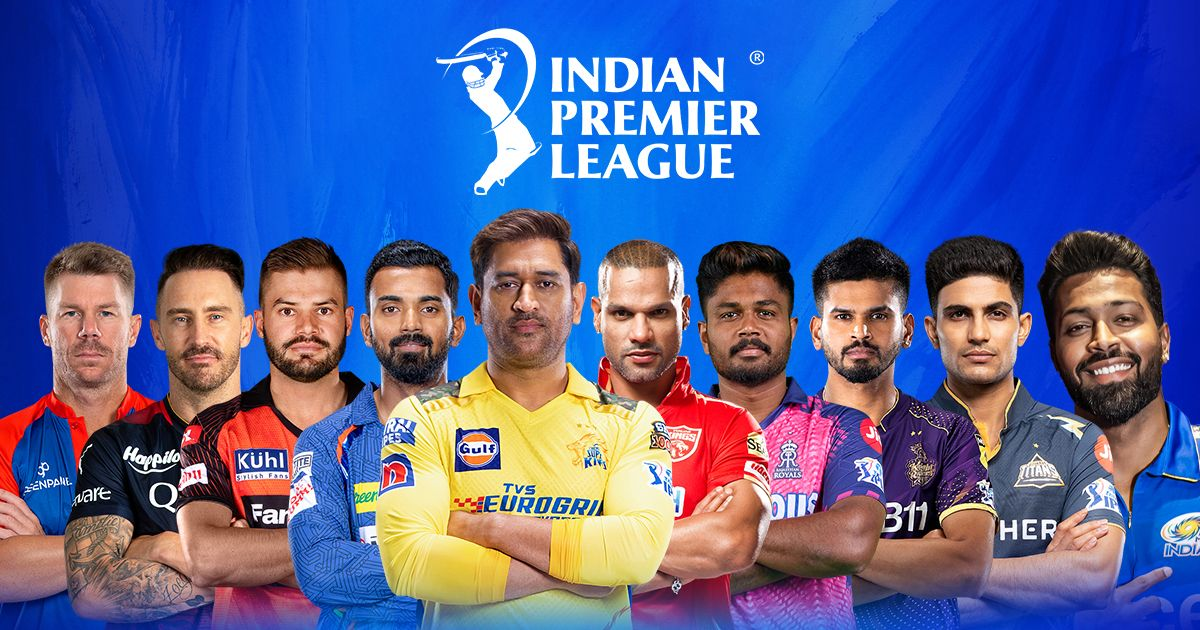

Indian Premier League (IPL) Data Analysis (2008-2020):

This project analyzes data from the Indian Premier League (IPL) seasons held between 2008 and 2020. The analysis focuses on key aspects of the tournament, including team performance, player statistics, and match dynamics, using a dataset containing match-level and ball-by-ball information. The objective is to uncover insights and trends that shed light on the evolution and characteristics of the IPL over this period.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Load the file (.csv)

matches_df = pd.read_csv("/content/IPL Matches 2008-2020.csv")
balls_df = pd.read_csv("/content/IPL Ball-by-Ball 2008-2020.csv")

In [ ]:
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [ ]:
balls_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
matches_df['date'] = pd.to_datetime(matches_df['date'])
matches_df['season'] = matches_df['date'].dt.year

In [ ]:
# 1. What was the count of matches played in each season?

matches_per_season =  matches_df['season'].value_counts().sort_index()
matches_per_season

,count
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


/tmp/ipython-input-2323203458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_per_season.index, y  = matches_per_season.values,palette = "mako")


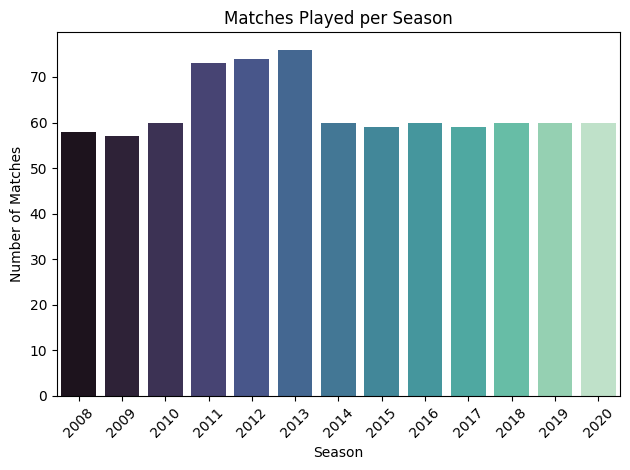

In [ ]:
plt.figure()
sns.barplot(x=matches_per_season.index, y  = matches_per_season.values,palette = "mako")

plt.title("Matches Played per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.xticks(rotation = 45)

plt.tight_layout()

plt.show()

In [ ]:
sns.set(style = "whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

/tmp/ipython-input-423402252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_per_season.index, y  = matches_per_season.values,palette = "viridis")


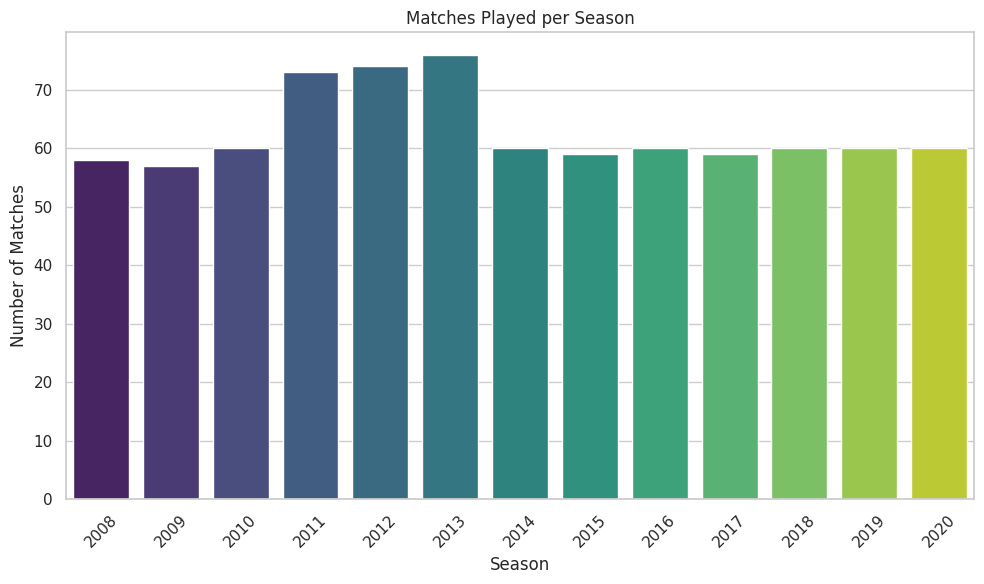

In [ ]:
plt.figure()
sns.barplot(x=matches_per_season.index, y  = matches_per_season.values,palette = "viridis")

plt.title("Matches Played per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.xticks(rotation = 45)

plt.tight_layout()

plt.show()

In [ ]:
#2. How many runs were scored in each seasons?

merged_df = balls_df.merge(matches_df[['id','season']],on = 'id')

In [ ]:
merged_df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,season
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,2020
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,2020
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians,2020
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,2020


In [ ]:
merged_df.groupby('season')['total_runs'].sum()

,total_runs
season,
2008,17937
2009,16320
2010,18864
2011,21154
2012,22453
2013,22541
2014,18909
2015,18332
2016,18862


In [ ]:
# 3. What were the runs scored per match in different seasons?

runs_per_match = merged_df.groupby(['season','id'])['total_runs'].sum()
runs_per_match

season  id     
2008    335982     304
        335983     447
        335984     261
        335985     331
        335986     222
                  ... 
2020    1216547    402
        1237177    343
        1237178    263
        1237180    361
        1237181    313
Name: total_runs, Length: 816, dtype: int64

In [ ]:
# 4. Who has umpired the most?

umpires = matches_df['umpire1'].value_counts() + matches_df['umpire2'].value_counts()
umpires = umpires.idxmax()
umpires

'S Ravi'

In [ ]:
# 5. Which team has won the most tosses?

toss = matches_df['toss_winner'].value_counts()
toss

,count
toss_winner,
Mumbai Indians,106
Kolkata Knight Riders,98
Chennai Super Kings,97
Rajasthan Royals,87
Royal Challengers Bangalore,87
Kings XI Punjab,85
Delhi Daredevils,80
Sunrisers Hyderabad,57
Deccan Chargers,43


In [ ]:
#6. What does the team decide after winning the toss?

decision = matches_df['toss_decision'].value_counts()
decision

,count
toss_decision,
field,496
bat,320


/tmp/ipython-input-2835098431.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = decision.index , y= decision.values, palette = 'viridis')


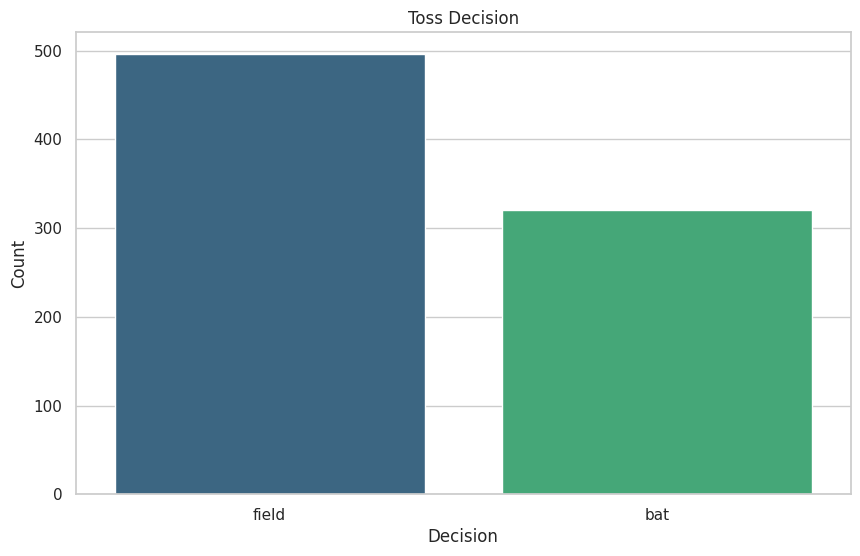

In [ ]:
sns.barplot(x = decision.index , y= decision.values, palette = 'viridis')
plt.title('Toss Decision')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

In [ ]:
#7. How does the toss decision vary across seasons?

seasons = matches_df.groupby('season')['toss_decision'].value_counts()
seasons

season  toss_decision
2008    field            32
        bat              26
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    field            48
        bat              25
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    field            41
        bat              19
2015    field            34
        bat              25
2016    field            49
        bat              11
2017    field            48
        bat              11
2018    field            50
        bat              10
2019    field            50
        bat              10
2020    field            33
        bat              27
Name: count, dtype: int64

In [ ]:
#8. Does winning the toss imply winning the game?

toss = matches_df['toss_winner'] == matches_df['winner']
toss.value_counts()

,count
True,418
False,398


In [ ]:
#9. How many times has the chasing team won the match?
chasing_team_wins = matches_df[matches_df['toss_winner'] == matches_df['winner']]['winner'].value_counts()
print(chasing_team_wins)

winner
Chennai Super Kings            61
Mumbai Indians                 61
Kolkata Knight Riders          55
Rajasthan Royals               44
Royal Challengers Bangalore    43
Kings XI Punjab                36
Delhi Daredevils               35
Sunrisers Hyderabad            29
Deccan Chargers                19
Delhi Capitals                 10
Gujarat Lions                  10
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: count, dtype: int64


/tmp/ipython-input-4115043745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chasing_team_wins.index, y=chasing_team_wins.values, palette='viridis')


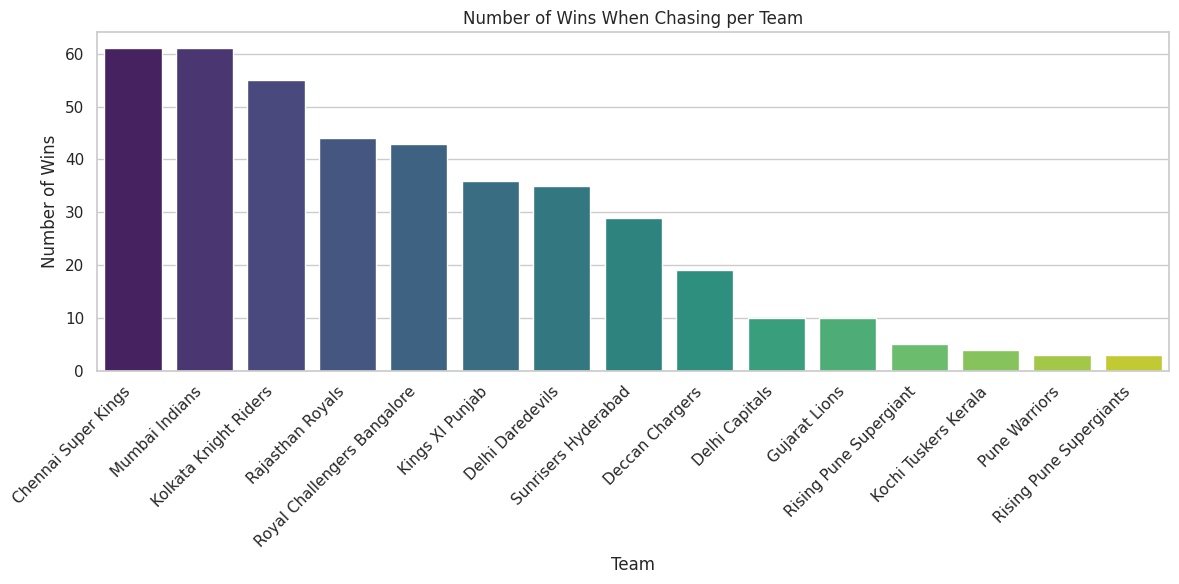

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=chasing_team_wins.index, y=chasing_team_wins.values, palette='viridis')
plt.title('Number of Wins When Chasing per Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#10. Which all teams had won this tournament?
tournament_winners = matches_df['winner'].value_counts()
tournament_winners

,count
winner,
Mumbai Indians,120
Chennai Super Kings,106
Kolkata Knight Riders,99
Royal Challengers Bangalore,91
Kings XI Punjab,88
Rajasthan Royals,81
Delhi Daredevils,67
Sunrisers Hyderabad,66
Deccan Chargers,29


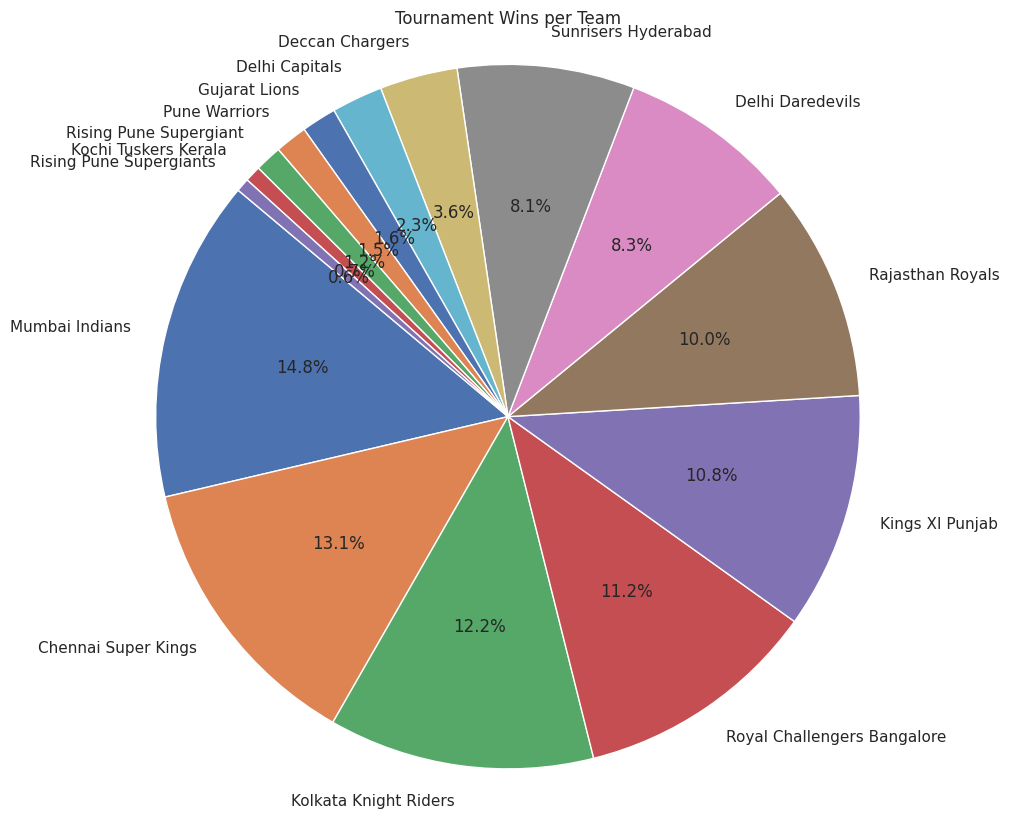

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(tournament_winners.values, labels=tournament_winners.index, autopct='%1.1f%%', startangle=140)
plt.title('Tournament Wins per Team')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
#11. Which team has played the most number of matches?

most_matches_counts = matches_df['team1'].value_counts() + matches_df['team2'].value_counts()
most_matches = most_matches_counts.idxmax()
most_matches

'Mumbai Indians'

/tmp/ipython-input-1649173601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_matches_counts.index, y=most_matches_counts.values, palette='viridis')


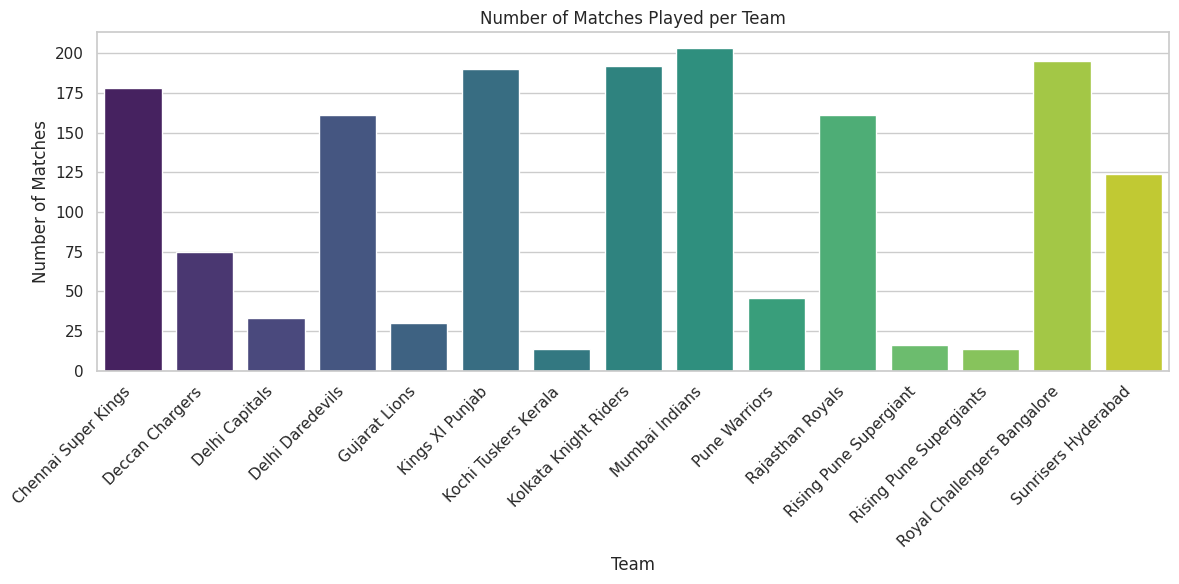

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=most_matches_counts.index, y=most_matches_counts.values, palette='viridis')
plt.title('Number of Matches Played per Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#12. Which team has won the most number of times?

most_matches = matches_df['winner'].value_counts()
most_matches = most_matches.idxmax()
most_matches

'Mumbai Indians'

In [ ]:
#13. Which team has the highest winning percentage?

winning = matches_df['winner'].value_counts()
winning = winning.idxmax()
winning

'Mumbai Indians'

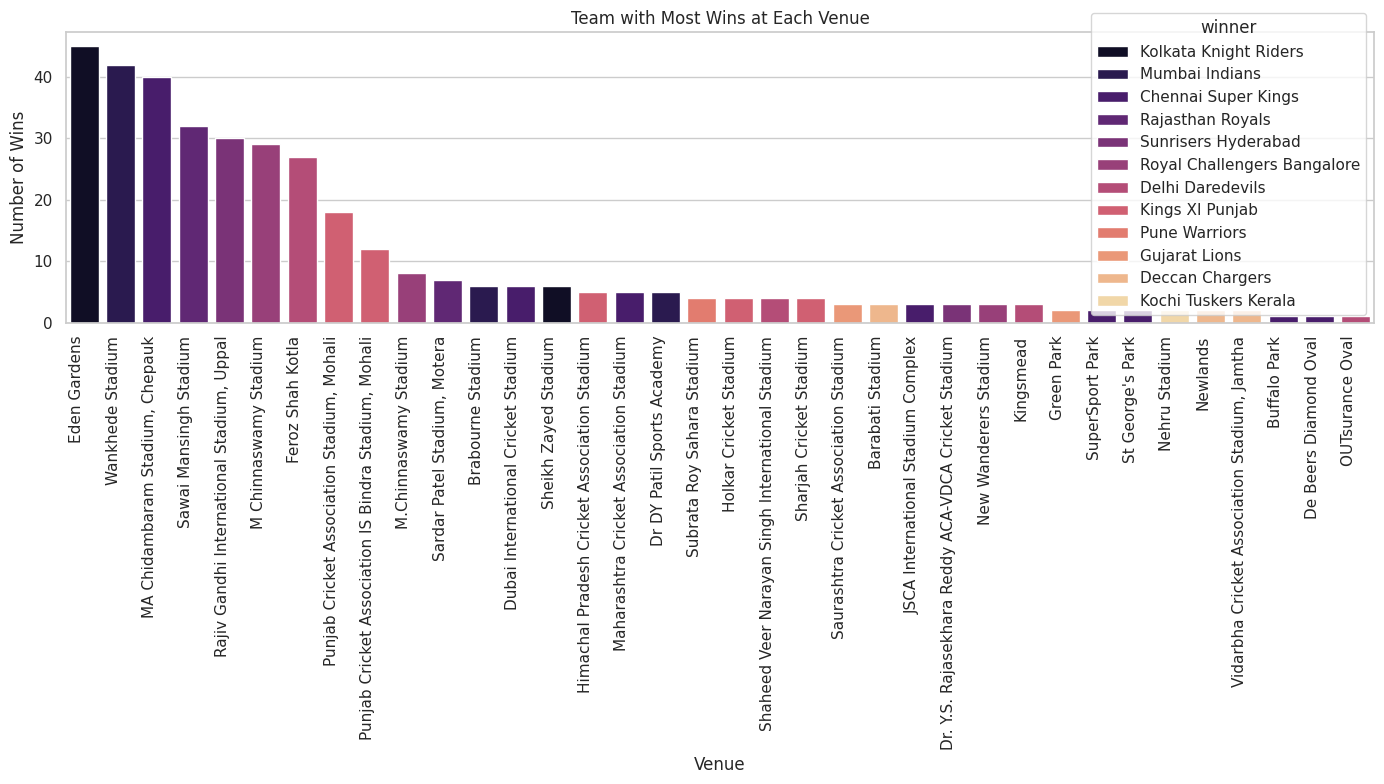

In [ ]:
#14. Is there any lucky venue for a particular team?

venue_wins = matches_df.groupby(['venue', 'winner']).size().reset_index(name='wins')
lucky_venue_per_team = venue_wins.loc[venue_wins.groupby('venue')['wins'].idxmax()]
lucky_venue_per_team = lucky_venue_per_team.sort_values(by='wins', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='venue', y='wins', hue='winner', data=lucky_venue_per_team, palette='magma')
plt.title('Team with Most Wins at Each Venue')
plt.xlabel('Venue')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#15. Innings wise comparison between teams?
innings = merged_df.groupby('inning')['total_runs'].sum()
innings


,total_runs
inning,
1,132069
2,120725


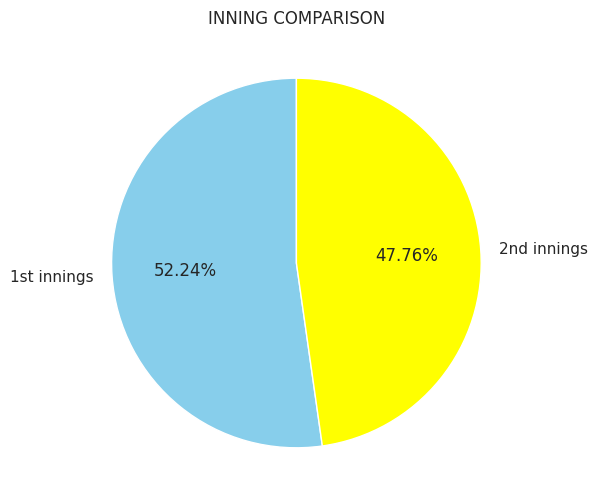

In [ ]:
#pie chart
import matplotlib.pyplot as plt

labels = ['1st innings','2nd innings']
sizes = [innings[1],innings[2]]
colors = ['skyblue','yellow']

plt.pie(sizes,labels=labels,colors=colors,autopct='%1.2f%%',startangle=90)
plt.title('INNING COMPARISON')
plt.show()



In [ ]:
#16. Which team has scored the most number of 200+ scores?
team_scores = merged_df.groupby('batting_team')['total_runs'].sum()
team_scores

,total_runs
batting_team,
Chennai Super Kings,28363
Deccan Chargers,11463
Delhi Capitals,5296
Delhi Daredevils,24285
Gujarat Lions,4856
Kings XI Punjab,30017
Kochi Tuskers Kerala,1901
Kolkata Knight Riders,29383
Mumbai Indians,32286


In [ ]:
#17. Which team has conceded 200+ scores the most?
team_scores = merged_df.groupby('bowling_team')['total_runs'].sum()
team_scores


,total_runs
bowling_team,
Chennai Super Kings,27245
Deccan Chargers,11618
Delhi Capitals,5351
Delhi Daredevils,24715
Gujarat Lions,5079
Kings XI Punjab,30427
Kochi Tuskers Kerala,1986
Kolkata Knight Riders,29374
Mumbai Indians,31158


In [ ]:
#18. What was the highest run scored by a team in a single match?
highest_run = merged_df.groupby('id')['total_runs'].max()
highest_run = highest_run.idxmax()
highest_run

np.int64(335988)

In [ ]:
#19. Which is the biggest win in terms of run margin?

biggest_win = matches_df.groupby('winner')['result_margin'].max()
biggest_win = biggest_win.idxmax()
biggest_win

'Mumbai Indians'

In [ ]:
#20. Which batsmen have played the most number of balls?

most_balls = balls_df.groupby('batsman')['ball'].max()
most_balls = most_balls.idxmax()
most_balls

'A Mishra'

In [ ]:
#21. Who are the leading run-scorers of all time?
leading_run_scorers = balls_df.groupby('batsman')['batsman_runs'].sum()
leading_run_scorers = leading_run_scorers.idxmax()
leading_run_scorers

'V Kohli'

In [ ]:
#22. Who has hit the most number of 4's?
most_fours = balls_df[balls_df['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count()
most_fours = most_fours.idxmax()
most_fours

'S Dhawan'

In [ ]:
#23. Who has hit the most number of 6's?
most_six = balls_df[balls_df['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count()
most_six = most_six.idxmax()
most_six

'CH Gayle'

In [ ]:
#24. Who has the highest strike rate?

highest_strike_rate = balls_df.groupby('batsman')['batsman_runs'].count()
highest_strike_rate = highest_strike_rate.idxmax()
highest_strike_rate

'V Kohli'

In [ ]:
#25. Who is the leading wicket-taker?
wicket_counts = balls_df.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False)
top_wicket_takers = wicket_counts.head(10)
display(top_wicket_takers)

,player_dismissed
bowler,
SL Malinga,188
DJ Bravo,175
A Mishra,169
PP Chawla,164
Harbhajan Singh,161
R Ashwin,153
B Kumar,146
SP Narine,143
UT Yadav,137


/tmp/ipython-input-1456218656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wicket_takers.index, y=top_wicket_takers.values, palette='viridis')


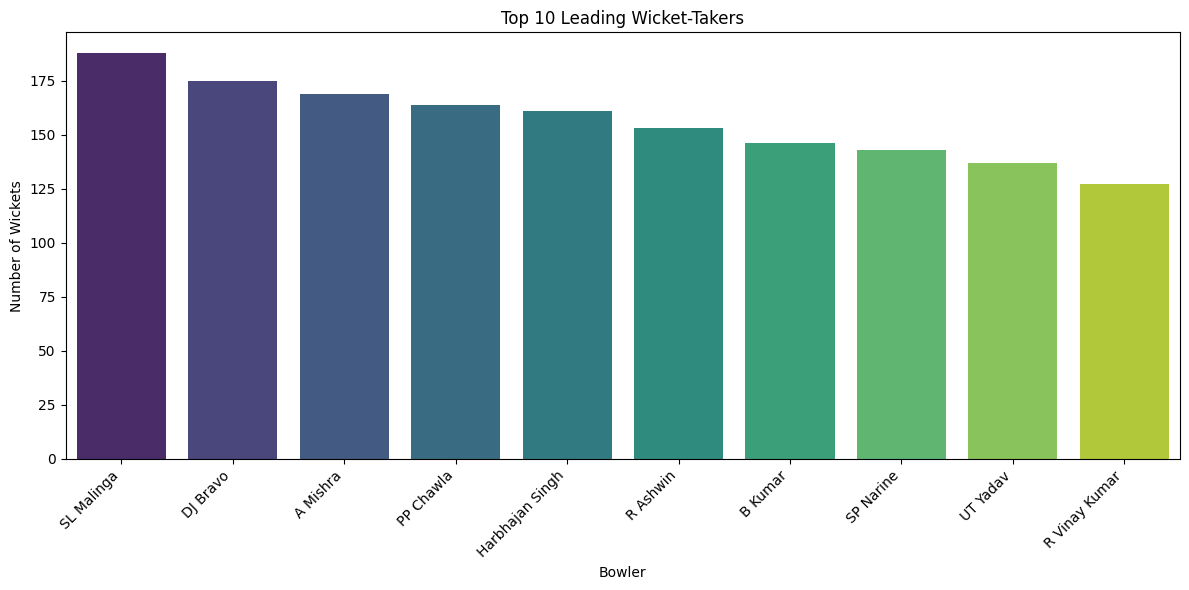

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_wicket_takers.index, y=top_wicket_takers.values, palette='viridis')
plt.title('Top 10 Leading Wicket-Takers')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#26. Which stadium has hosted the most number of matches?
most_matches = matches_df['venue'].value_counts()
most_matches = most_matches.idxmax()
most_matches

'Eden Gardens'

In [ ]:
#27. Who has won the most MOM awards?
most_mom = matches_df['player_of_match'].value_counts()
most_mom = most_mom.idxmax()
most_mom

'AB de Villiers'

In [ ]:
#28. What is the count of fours hit in each season?
fours = merged_df[merged_df['batsman_runs'] == 4].groupby('season')['batsman_runs'].count()
fours

,batsman_runs
season,
2008,1703
2009,1317
2010,1708
2011,1916
2012,1911
2013,2052
2014,1562
2015,1607
2016,1633


/tmp/ipython-input-1343204573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fours.index, y=fours.values, palette='viridis')


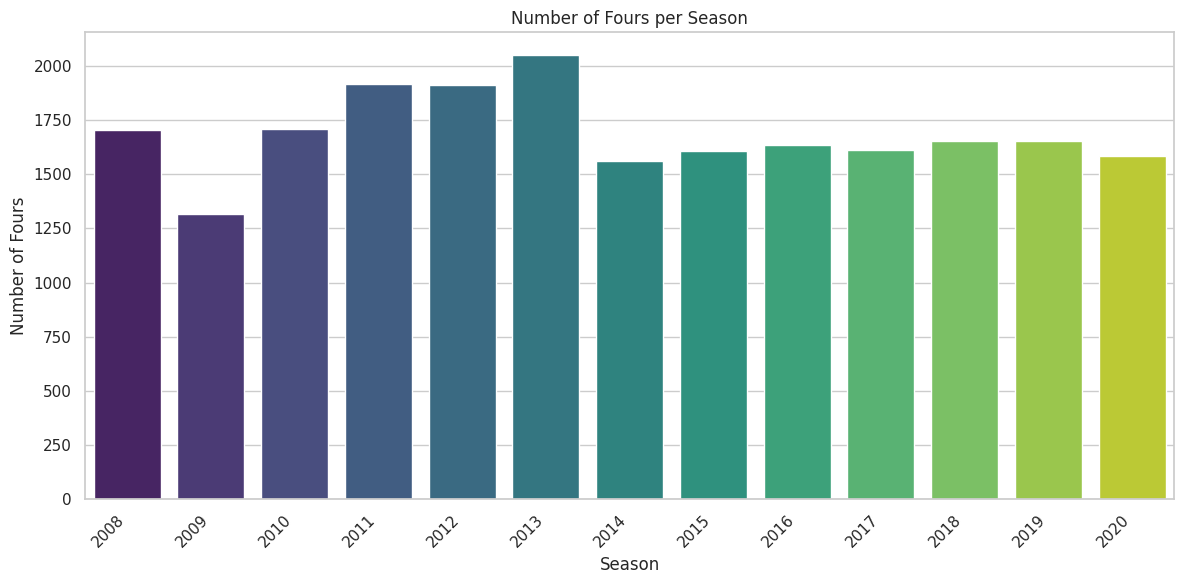

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=fours.index, y=fours.values, palette='viridis')
plt.title('Number of Fours per Season')
plt.xlabel('Season')
plt.ylabel('Number of Fours')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#29. What is the count of sixes hit in each season?
sixes = merged_df[merged_df['batsman_runs'] == 6].groupby('season')['batsman_runs'].count()
sixes

,batsman_runs
season,
2008,623
2009,506
2010,585
2011,639
2012,733
2013,675
2014,714
2015,692
2016,639


/tmp/ipython-input-604838149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sixes.index, y=sixes.values, palette='YlOrRd')


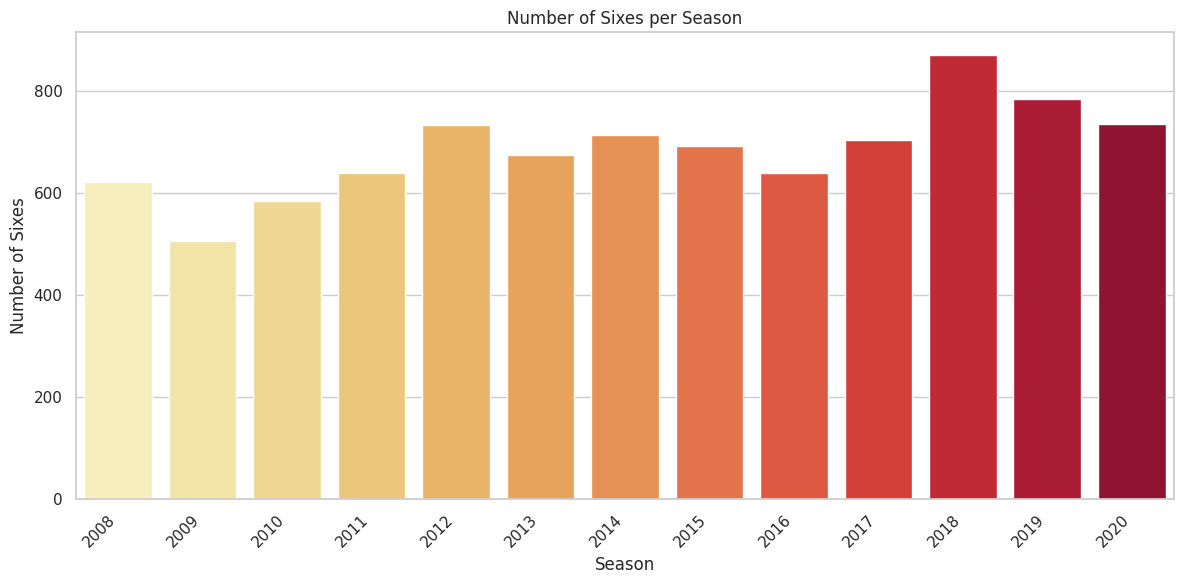

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=sixes.index, y=sixes.values, palette='YlOrRd')
plt.title('Number of Sixes per Season')
plt.xlabel('Season')
plt.ylabel('Number of Sixes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#30. What is the count of runs scored from boundaries in each season?
boundaries = merged_df[(merged_df['batsman_runs'] == 4) | (merged_df['batsman_runs'] == 6)].groupby('season')['batsman_runs'].count()
boundaries

,batsman_runs
season,
2008,2326
2009,1823
2010,2293
2011,2555
2012,2644
2013,2727
2014,2276
2015,2299
2016,2272


/tmp/ipython-input-2971007970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=boundaries.index, y=boundaries.values, palette='plasma')


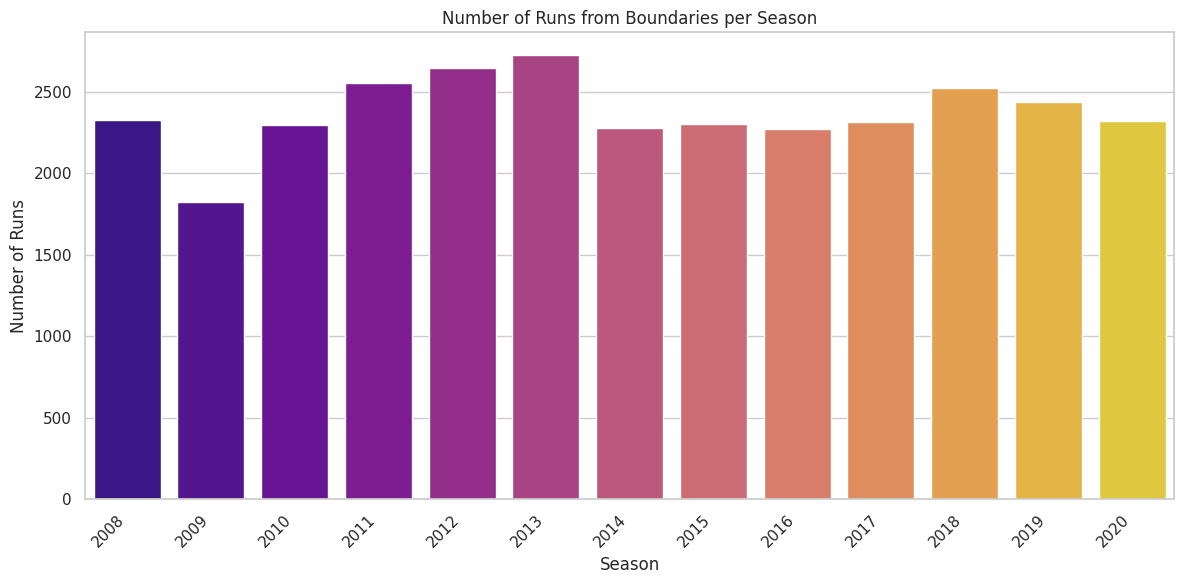

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=boundaries.index, y=boundaries.values, palette='plasma')
plt.title('Number of Runs from Boundaries per Season')
plt.xlabel('Season')
plt.ylabel('Number of Runs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#31. What is the run contribution from boundaries in each season?
run_contribution = merged_df[(merged_df['batsman_runs'] == 4) | (merged_df['batsman_runs'] == 6)].groupby('season')['total_runs'].sum()
run_contribution

,total_runs
season,
2008,10566
2009,8318
2010,10351
2011,11510
2012,12057
2013,12267
2014,10542
2015,10587
2016,10376


/tmp/ipython-input-2701946063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=run_contribution.index, y=run_contribution.values, palette='crest')


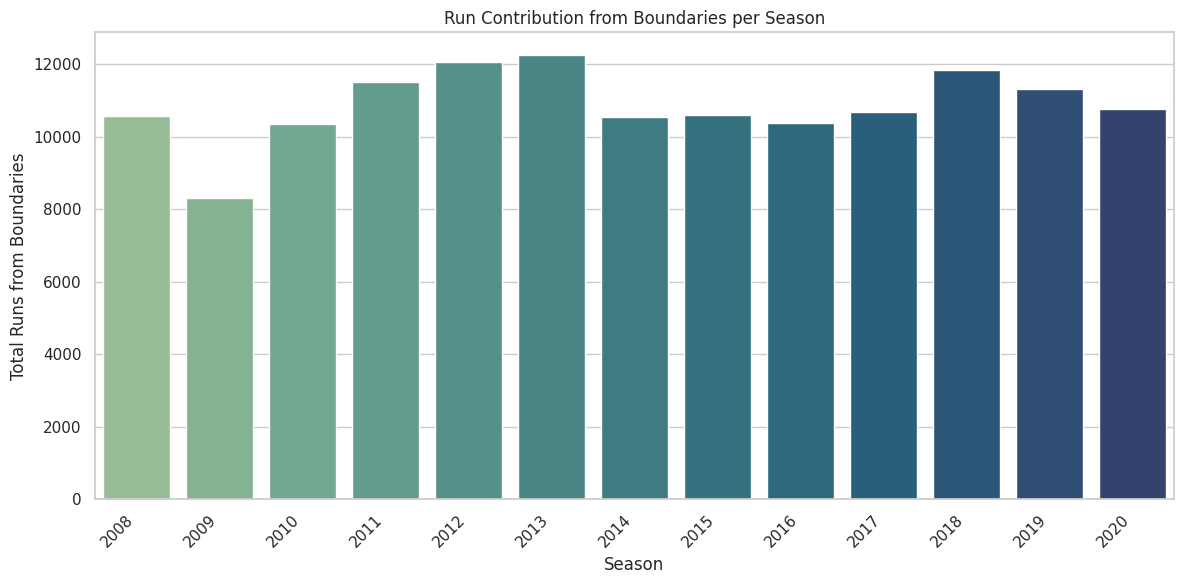

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=run_contribution.index, y=run_contribution.values, palette='crest')
plt.title('Run Contribution from Boundaries per Season')
plt.xlabel('Season')
plt.ylabel('Total Runs from Boundaries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#32. Which team has scored the most runs in the first 6 overs?
first_six_overs = merged_df[merged_df['over'] <= 6].groupby('batting_team')['total_runs'].sum()
first_six_overs = first_six_overs.idxmax()
first_six_overs

'Mumbai Indians'

In [ ]:
#33. Which team has scored the most runs in the last 4 overs?
last_four_overs = merged_df[merged_df['over'] > 16].groupby('batting_team')['total_runs'].sum()
last_four_overs = last_four_overs.idxmax()
last_four_overs

'Mumbai Indians'

In [ ]:
#34. Which team has the best scoring run-rate in the first 6 overs?
run_rate = merged_df[merged_df['over'] <= 6].groupby('batting_team')['total_runs'].sum() / merged_df[merged_df['over'] <= 6].groupby('batting_team')['ball'].count()
run_rate

,0
batting_team,
Chennai Super Kings,1.195922
Deccan Chargers,1.186394
Delhi Capitals,1.252978
Delhi Daredevils,1.212450
Gujarat Lions,1.384263
Kings XI Punjab,1.237681
Kochi Tuskers Kerala,1.236334
Kolkata Knight Riders,1.215148
Mumbai Indians,1.177211


/tmp/ipython-input-1326971807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=run_rate.index, y=run_rate.values, palette='icefire')


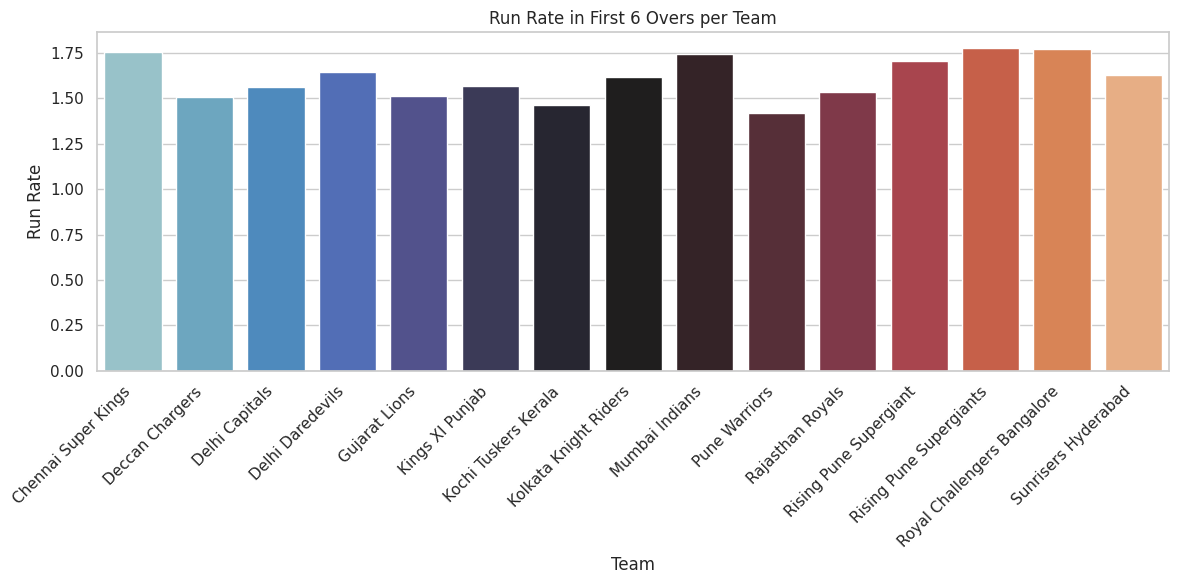

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=run_rate.index, y=run_rate.values, palette='icefire')
plt.title('Run Rate in First 6 Overs per Team')
plt.xlabel('Team')
plt.ylabel('Run Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#35. Which team has the best scoring run-rate in the last 4 overs?
run_rate = merged_df[merged_df['over'] > 16].groupby('batting_team')['total_runs'].sum() / merged_df[merged_df['over'] > 16].groupby('batting_team')['ball'].count()
run_rate

,0
batting_team,
Chennai Super Kings,1.755393
Deccan Chargers,1.509449
Delhi Capitals,1.560219
Delhi Daredevils,1.646980
Gujarat Lions,1.513699
Kings XI Punjab,1.565320
Kochi Tuskers Kerala,1.465517
Kolkata Knight Riders,1.614613
Mumbai Indians,1.743433


/tmp/ipython-input-1920333269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=run_rate.index, y=run_rate.values, palette='coolwarm')


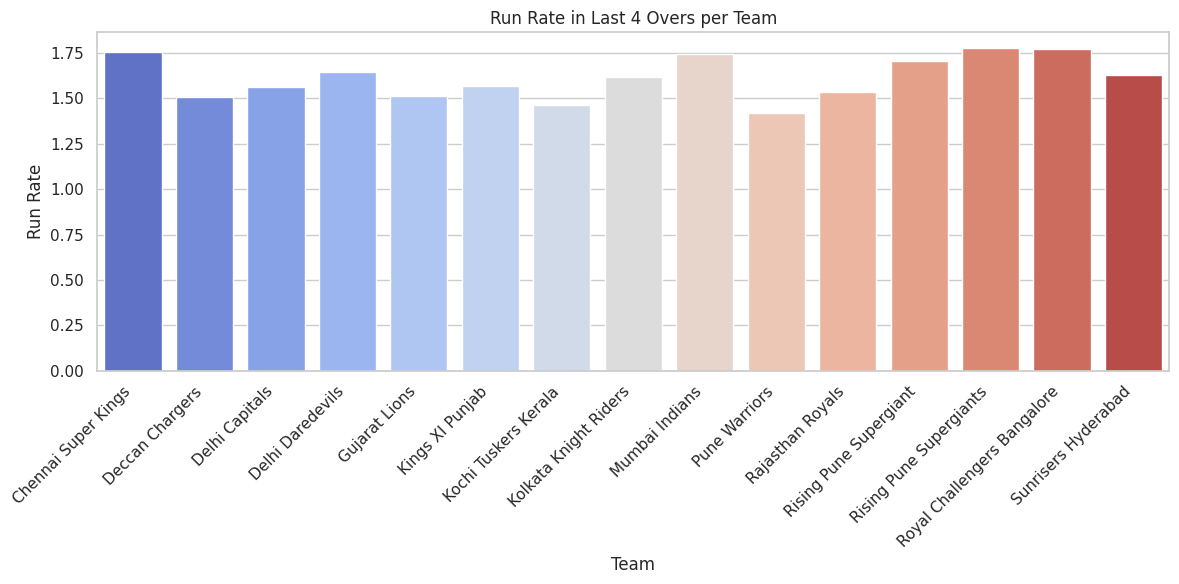

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=run_rate.index, y=run_rate.values, palette='coolwarm')
plt.title('Run Rate in Last 4 Overs per Team')
plt.xlabel('Team')
plt.ylabel('Run Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

📌 Conclusion

This project provided an in-depth analysis of the Indian Premier League (IPL) from 2008 to 2020, leveraging a ball-by-ball dataset to extract insights into team performances, player contributions, and match outcomes. By cleaning, processing, and visualizing the data, we were able to uncover key patterns and trends that highlight the evolution of the tournament over more than a decade.


🔹 Key Findings

Team Performances

Teams like Mumbai Indians (MI) and Chennai Super Kings (CSK) consistently dominated across seasons, showcasing strong balance between batting and bowling units.

New franchises often struggled in their debut years, but some (like Sunrisers Hyderabad) quickly established themselves as competitive.

Player Contributions

The dataset highlighted consistent top scorers and wicket-takers across seasons, allowing us to identify impact players and emerging stars.

Certain players excelled in specific roles (e.g., powerplay hitters, death-over bowlers).

Match Dynamics

Toss outcomes influenced results, especially in conditions favoring chasing.

Death overs (16–20) played a decisive role in determining match outcomes, both for setting competitive targets and defending totals.

Venues and pitch conditions significantly impacted run rates and wicket patterns.

Trends Across Years

Batting strike rates improved over the years, showing the evolution of aggressive T20 batting strategies.

Bowling economy rates became more challenging to maintain as batting depth increased.


🔹 Limitations

The dataset covers only up to 2020, so recent IPL seasons are not included.

Player injuries, team strategies, and external factors (like weather) are not fully captured in the data.

Certain advanced metrics (e.g., fielding contributions) are difficult to measure with the given dataset.


🔹 Future Scope

Extend the analysis to include recent IPL seasons (2021 onwards).

Develop predictive models for match outcomes, player performance, or win probabilities in real time.

Create interactive dashboards for visualization, enabling fans and analysts to explore IPL data dynamically.

Incorporate sentiment analysis of commentary or social media to complement performance metrics.


✅ Overall, this project demonstrates how data science and statistical analysis can provide valuable insights into cricket, not only for fans but also for analysts, franchises, and strategists. The IPL dataset proves to be a rich resource for understanding the dynamics of T20 cricket and its evolution over time.